# PRODIGY INFOTECH

# TASK DONE BY: ADARSH POOJARY

In [3]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('C:/Users/Adarsh Poojary/PRODIGY_DS_02/train.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Checking for missing values in  datasets
missing_train = train_df.isnull().sum()

In [6]:
# Checking for duplicate rows in datasets
duplicates_train = train_df.duplicated().sum()

In [7]:
missing_train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
duplicates_train

0

# Cleaning the data

In [9]:
# Filling missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())  # Impute Age with median
train_df['Cabin'] = train_df['Cabin'].fillna('Unknown')  # Fill Cabin with 'Unknown'
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])  # Impute Embarked with the most frequent value

# Rechecking missing values after imputation
missing_train_after = train_df.isnull().sum()

missing_train_after


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Training Work

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Select features and target variable
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_df['Survived']

In [12]:
# Categorical columns to be encoded
categorical_cols = ['Sex', 'Embarked']

In [13]:
# Numerical columns to be scaled
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

In [14]:
# Create transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [15]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [16]:
# Combine into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [17]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create a Logistic Regression pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [19]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [20]:
# Predict on the validation set
y_pred = model.predict(X_val)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.7877

Confusion Matrix:
[[90 15]
 [23 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



# Testing phase

In [22]:
import pandas as pd
test_df = pd.read_csv('C:/Users/Adarsh Poojary/PRODIGY_DS_02/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
missing_test = test_df.isnull().sum()
duplicates_test = test_df.duplicated().sum()
missing_test, duplicates_test

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 0)

In [24]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())  # Impute Age with median
test_df['Cabin'] = test_df['Cabin'].fillna('Unknown')  # Fill Cabin with 'Unknown'
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())  # Impute Fare with median

In [25]:
missing_test_after = test_df.isnull().sum()
missing_test_after

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
# Preprocess and predict on the test dataset
X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Predict the survival for the test data
y_test_pred = model.predict(X_test)

# Prepare a DataFrame with PassengerId and predicted Survived
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_test_pred
})

# Display the first few rows of the submission
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Exploratory Data analysis

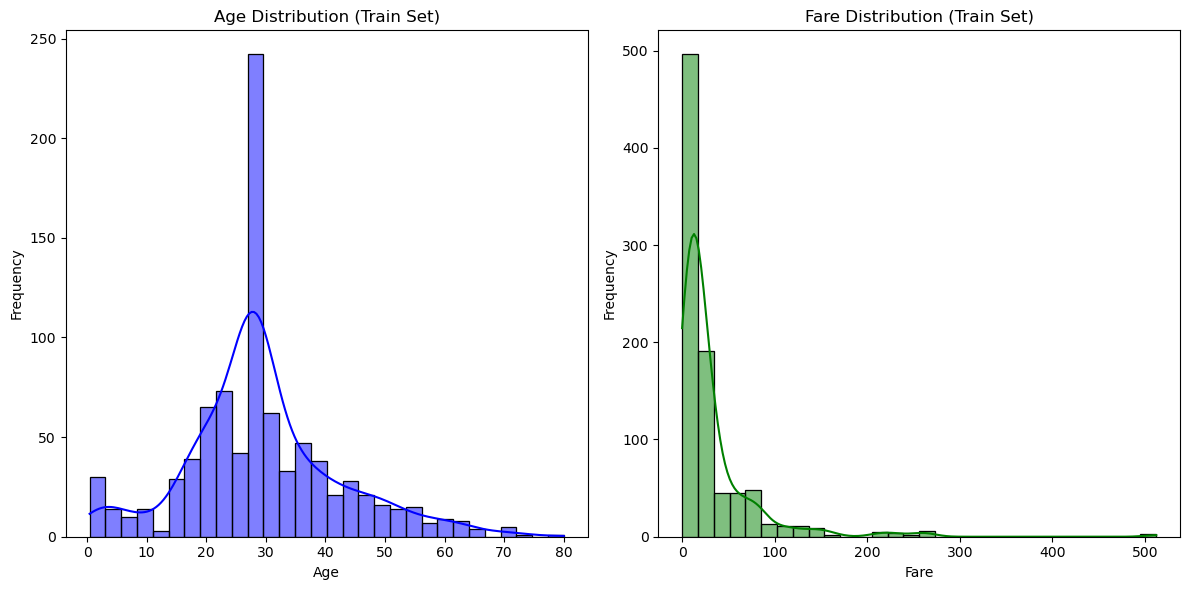

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of Age and Fare
plt.figure(figsize=(12, 6))

# Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(train_df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution (Train Set)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Fare Distribution
plt.subplot(1, 2, 2)
sns.histplot(train_df['Fare'], bins=30, kde=True, color='green')
plt.title('Fare Distribution (Train Set)')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


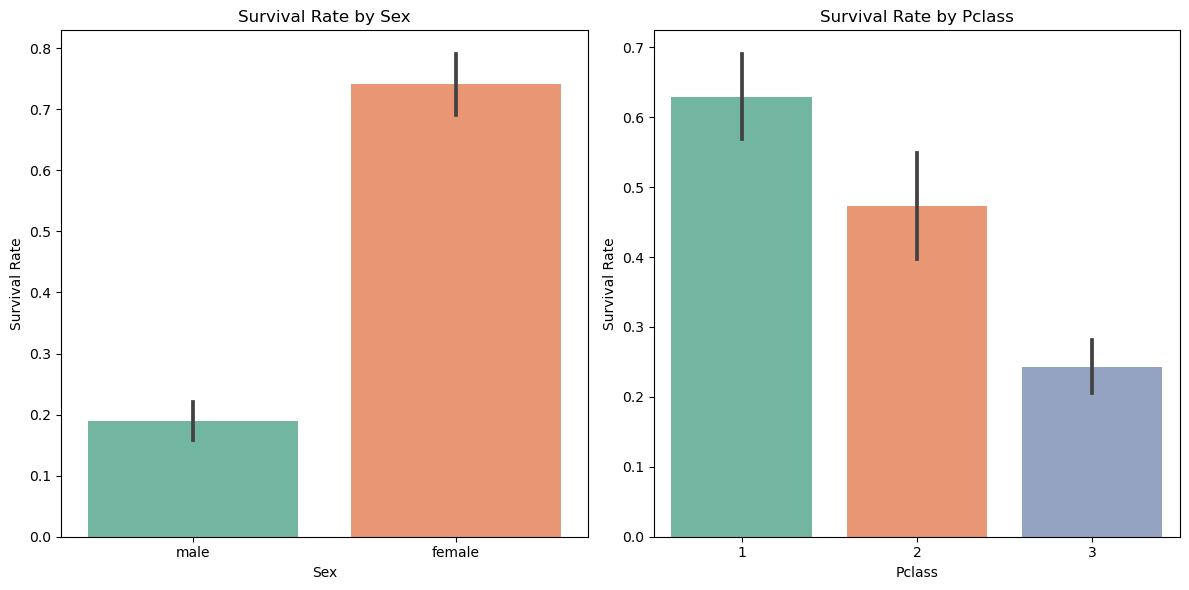

In [28]:
# Survival analysis based on categorical variables
plt.figure(figsize=(12, 6))

# Survival rate by Sex
plt.subplot(1, 2, 1)
sns.barplot(x='Sex', y='Survived', data=train_df, palette='Set2')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

# Survival rate by Pclass
plt.subplot(1, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=train_df, palette='Set2')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()


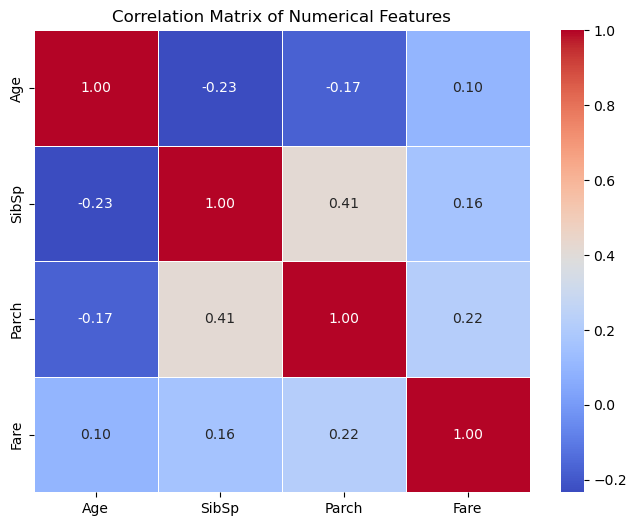

In [29]:
# Correlation heatmap between numerical variables
correlation_matrix = train_df[['Age', 'SibSp', 'Parch', 'Fare']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [30]:

# Preprocess and predict on the test dataset
X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Predict the survival for the test data
y_test_pred = model.predict(X_test)

# Prepare a DataFrame with PassengerId and predicted Survived
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_test_pred
})

print(submission.head())

# save the output to a CSV file 
submission.to_csv('survival_predictions.csv', index=False)


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
